### <i>P1: Normal and tengent vectors for NACA 0010</i>

In [1]:
import math
import numpy
from scipy import integrate
from matplotlib import pyplot
%matplotlib inline

In [57]:
class Panel:
    def __init__(self, xa, ya, xb, yb, sigma):
        #Start and end points
        self.xa, self.xb = xa, xb
        self.ya, self.yb = ya, yb
        
        #Center and length
        self.xc, self.yc = 0.5*(xa+xb), 0.5*(ya+yb)
        self.length = math.sqrt((xb-xa)**2 + (yb-ya)**2)
        
        #Panel strength
        self.strength = sigma
        
        #Define panel orientation
        if xb-xa <= 0.:
            self.beta = math.acos((yb-ya)/self.length)
        elif xb-xa > 0.:    
            self.beta = math.pi + math.acos(-(yb-ya)/self.length)
            
        #Define normal vectors
        self.normx = yb-ya
        self.normy = xa-xb
        
        #Define tangent vectors
        self.tanx = xb-xa
        self.tany = yb-ya
            
        self.sigma = 0.
        self.vt = 0.
        self.cp = 0.

In [58]:
def JoukowskiTransform(zetamat, zetac, a):
    zmat = (zetamat+zetac) + a**2/(zetamat+zetac)
    return zmat

In [64]:
#Define geometry for circle:

R = 1.0
theta = numpy.linspace(0, 2.0*math.pi, 100)
xcyl, ycyl = R*numpy.cos(theta), R*numpy.sin(theta)

#Define number of panels:
N_panels = 20

T = 0.1; H = 0.0; c = 1.0; a = c/4
ip = 0

zeta_c = -4*a/(3*math.sqrt(3))*T + 1j*2*a*H
r_s = (0.25 +T/(3*math.sqrt(3)))

# defining the end-points of the panels
xend = R*numpy.cos(numpy.linspace(0, 2*math.pi, N_panels+1))
yend = R*numpy.sin(numpy.linspace(0, 2*math.pi, N_panels+1))

#Define panels:
panels = numpy.empty(N_panels,dtype = object)
for i in range (N_panels):
    zeta1 = (xend[i] +1j*yend[i])*r_s
    zeta2 = (xend[i+1] +1j*yend[i+1])*r_s
    Z1 = JoukowskiTransform(zeta1, zeta_c, a)
    Z2 = JoukowskiTransform(zeta2, zeta_c, a)
    panels[i] = Panel(Z1.real, Z1.imag, Z2.real, Z2.imag, 0.)

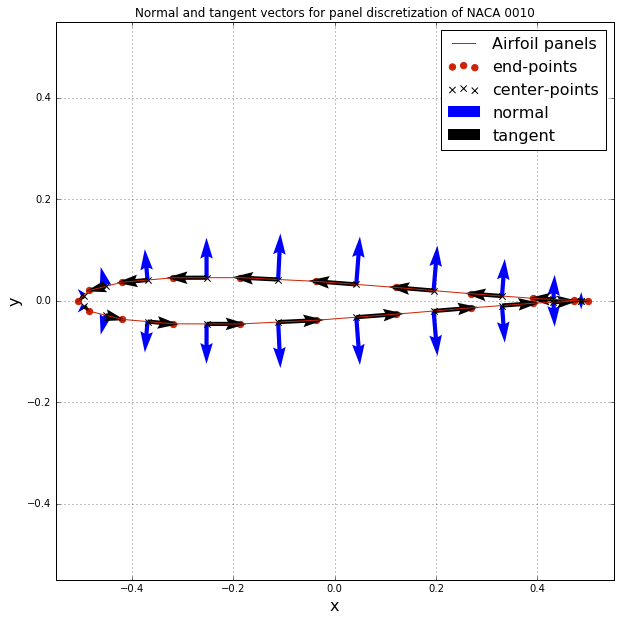

In [65]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.title('Normal and tangent vectors for panel discretization of NACA 0010')
pyplot.plot([p.xa for p in panels], [p.ya for p in panels], color='#CD2305')
pyplot.scatter([p.xa for p in panels], [p.ya for p in panels], color='#CD2305', s=40)
pyplot.scatter([p.xc for p in panels], [p.yc for p in panels], color='k', marker='x',s=40, zorder=3)
pyplot.quiver([p.xc for p in panels], [p.yc for p in panels], [p.normx for p in panels], [p.normy for p in panels], color='#0000FF')
pyplot.quiver([p.xc for p in panels], [p.yc for p in panels], [p.tanx for p in panels], [p.tany for p in panels], color='#000000')
pyplot.legend(['Airfoil panels', 'end-points', 'center-points', 'normal', 'tangent'], 
           loc='best', prop={'size':16})
pyplot.xlim(-0.55, 0.55)
pyplot.ylim(-0.55, 0.55);

<hr>

### <i>P2: Flow created by unit source panel</i>

In [66]:
def source_sheet(Xg, Yg, N, p):
    # computes the velcity field generated by the source-sheet
    u_sheet = numpy.empty_like(Xg, dtype=float)
    v_sheet = numpy.empty_like(Xg, dtype=float)
    
    #Define slope of panel
    m = (p.yb-p.ya)/(p.xb-p.xa);
    clen = numpy.sqrt((p.xb-p.xa)**2 + (p.yb-p.ya)**2)
    cosb = (p.xb-p.xa)/clen; sinb = (p.yb-p.ya)/clen
    
    for i in range(N):
        for j in range(N):  
            integrand = lambda s : (Xg[i,j]-s*cosb)/((Xg[i,j]-s*cosb)**2+(Yg[i,j]-s*sinb)**2)
            u_sheet[i,j] = strength/(2*math.pi)*integrate.quad(integrand, p.xa/cosb, p.xb/cosb)[0]

            integrand = lambda s : (Yg[i,j]-s*sinb)/((Xg[i,j]-s*cosb)**2+(Yg[i,j]-s*sinb)**2)
            v_sheet[i,j] = strength/(2*math.pi)*integrate.quad(integrand, p.ya/sinb, p.yb/sinb)[0]
            
    return (u_sheet, v_sheet)

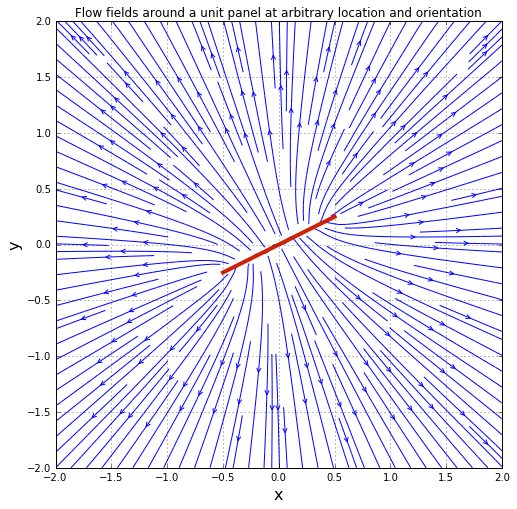

In [67]:
Xmin = -2.0; Xmax = 2.0; Ymin = -2.0; Ymax = 2.0; N = 50
x = numpy.linspace(Xmin, Xmax, N); y = numpy.linspace(Ymin, Ymax, N);
X, Y = numpy.meshgrid(x,y); 

strength = 1.0; 
xst = -0.5; xen = 0.5; yst = -0.25; yen = 0.25;

#Define panel
spanel = Panel(xst, yst, xen, yen, strength)

usource = numpy.zeros_like(X); vsource = numpy.zeros_like(X)

usource, vsource = source_sheet(X, Y, N, spanel)

# plots the streamlines
size = 8
pyplot.figure(figsize=(size, (Ymax-Ymin)/(Xmax-Xmin)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.streamplot(X, Y, usource, vsource, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.title('Flow fields around a unit panel at arbitrary location and orientation')
pyplot.plot([xst, xen], [yst, yen], color='#CD2305', linewidth=4)